<a href="https://colab.research.google.com/github/Nanda23B/Predictions/blob/main/Prediccion_Sobrepeso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Librerías**

In [176]:
import sklearn

In [177]:
import pandas as pd #Manejo de vectores, dataframes

In [178]:
import numpy as np #Manejo de estadística descriptiva

In [179]:
import matplotlib.pyplot as plt #Manejo de gráficos

In [180]:
import tensorflow as tf

In [181]:
import seaborn as sns

In [182]:
from sklearn.feature_selection import SelectKBest

In [183]:
from sklearn.feature_selection import chi2

In [184]:
from sklearn.preprocessing import StandardScaler

In [185]:
from sklearn.model_selection import train_test_split

In [186]:
from sklearn.preprocessing import MinMaxScaler

In [187]:
from sklearn.metrics import confusion_matrix,classification_report

In [188]:
from sklearn.metrics import accuracy_score

**2. Ingreso deL *DataSet***

In [189]:
df_obesity = pd.read_csv('DataSet.csv')

**3. Reconocimiento de datos**

In [190]:
df_obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


**3.1. Tipos de datos**

In [191]:
df_obesity.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                                 int64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

**3.2. Dimensión de los datos**

In [192]:
df_obesity.shape

(2111, 17)

In [193]:
df_numerica = df_obesity.select_dtypes(include=[np.number])

In [194]:
numerica_cols = df_numerica.columns.values

In [195]:
print(numerica_cols)

['Age' 'Height' 'Weight' 'FCVC' 'NCP' 'CH2O' 'FAF' 'TUE']


In [196]:
df_no_numerica = df_obesity.select_dtypes(exclude=[np.number])

In [197]:
no_numerica_cols = df_no_numerica.columns.values

In [198]:
print(no_numerica_cols)

['Gender' 'family_history_with_overweight' 'FAVC' 'CAEC' 'SMOKE' 'SCC'
 'CALC' 'MTRANS' 'NObeyesdad']


In [199]:
conteo_datos = df_obesity.groupby('Gender').size()

In [200]:
print(conteo_datos)

Gender
Female    1043
Male      1068
dtype: int64


In [201]:
gen_ = {'Female':1, 'Male':2}

In [202]:
df_obesity['Gender'] = df_obesity['Gender'].map(gen_)

In [203]:
df_obesity

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.000000,1.620000,64.000000,yes,no,2.0,3,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,1,21.000000,1.520000,56.000000,yes,no,3.0,3,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,2,23.000000,1.800000,77.000000,yes,no,2.0,3,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,2,27.000000,1.800000,87.000000,no,no,3.0,3,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,2,22.000000,1.780000,89.800000,no,no,2.0,1,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,yes,yes,3.0,3,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,1,21.982942,1.748584,133.742943,yes,yes,3.0,3,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,1,22.524036,1.752206,133.689352,yes,yes,3.0,3,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,1,24.361936,1.739450,133.346641,yes,yes,3.0,3,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [204]:
conteo_datos = df_obesity.groupby('family_history_with_overweight').size()

In [205]:
print(conteo_datos)

family_history_with_overweight
no      385
yes    1726
dtype: int64


In [206]:
family_ = {'yes':1, 'no':2}

In [207]:
df_obesity['family_history_with_overweight'] = df_obesity['family_history_with_overweight'].map(family_)

In [208]:
df_obesity

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.000000,1.620000,64.000000,1,no,2.0,3,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,1,21.000000,1.520000,56.000000,1,no,3.0,3,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,2,23.000000,1.800000,77.000000,1,no,2.0,3,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,2,27.000000,1.800000,87.000000,2,no,3.0,3,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,2,22.000000,1.780000,89.800000,2,no,2.0,1,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,yes,3.0,3,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,1,21.982942,1.748584,133.742943,1,yes,3.0,3,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,1,22.524036,1.752206,133.689352,1,yes,3.0,3,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,1,24.361936,1.739450,133.346641,1,yes,3.0,3,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [209]:
conteo_datos = df_obesity.groupby('FAVC').size()

In [210]:
print(conteo_datos)

FAVC
no      245
yes    1866
dtype: int64


In [211]:
favc_ = {'yes':1, 'no':2}

In [212]:
df_obesity['FAVC'] = df_obesity['FAVC'].map(favc_)

In [213]:
df_obesity

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.000000,1.620000,64.000000,1,2,2.0,3,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,1,21.000000,1.520000,56.000000,1,2,3.0,3,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,2,23.000000,1.800000,77.000000,1,2,2.0,3,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,2,27.000000,1.800000,87.000000,2,2,3.0,3,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,2,22.000000,1.780000,89.800000,2,2,2.0,1,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [214]:
conteo_datos = df_obesity.groupby('CAEC').size()

In [215]:
print(conteo_datos)

CAEC
Always          53
Frequently     242
Sometimes     1765
no              51
dtype: int64


In [216]:
caec_ = {'Always':1, 'Frequently':2, 'Sometimes':3, 'no':4}

In [217]:
df_obesity['CAEC'] = df_obesity['CAEC'].map(caec_)

In [218]:
df_obesity

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.000000,1.620000,64.000000,1,2,2.0,3,3,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,1,21.000000,1.520000,56.000000,1,2,3.0,3,3,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,2,23.000000,1.800000,77.000000,1,2,2.0,3,3,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,2,27.000000,1.800000,87.000000,2,2,3.0,3,3,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,2,22.000000,1.780000,89.800000,2,2,2.0,1,3,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3,3,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3,3,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3,3,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3,3,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [219]:
conteo_datos = df_obesity.groupby('SMOKE').size()

In [220]:
print(conteo_datos)

SMOKE
no     2067
yes      44
dtype: int64


In [221]:
smoke_ = {'yes':1, 'no':2}

In [222]:
df_obesity['SMOKE'] = df_obesity['SMOKE'].map(smoke_)

In [223]:
df_obesity

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.000000,1.620000,64.000000,1,2,2.0,3,3,2,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,1,21.000000,1.520000,56.000000,1,2,3.0,3,3,1,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,2,23.000000,1.800000,77.000000,1,2,2.0,3,3,2,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,2,27.000000,1.800000,87.000000,2,2,3.0,3,3,2,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,2,22.000000,1.780000,89.800000,2,2,2.0,1,3,2,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3,3,2,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3,3,2,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3,3,2,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3,3,2,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [224]:
conteo_datos = df_obesity.groupby('SCC').size()

In [225]:
print(conteo_datos)

SCC
no     2015
yes      96
dtype: int64


In [226]:
scc_ = {'yes':1, 'no':2}

In [227]:
df_obesity['SCC'] = df_obesity['SCC'].map(scc_)

In [228]:
df_obesity

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.000000,1.620000,64.000000,1,2,2.0,3,3,2,2.000000,2,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,1,21.000000,1.520000,56.000000,1,2,3.0,3,3,1,3.000000,1,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,2,23.000000,1.800000,77.000000,1,2,2.0,3,3,2,2.000000,2,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,2,27.000000,1.800000,87.000000,2,2,3.0,3,3,2,2.000000,2,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,2,22.000000,1.780000,89.800000,2,2,2.0,1,3,2,2.000000,2,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3,3,2,1.728139,2,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3,3,2,2.005130,2,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3,3,2,2.054193,2,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3,3,2,2.852339,2,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [229]:
conteo_datos = df_obesity.groupby('CALC').size()

In [230]:
print(conteo_datos)

CALC
Always           1
Frequently      70
Sometimes     1401
no             639
dtype: int64


In [231]:
calc_ = {'Always':1, 'Frequently':2, 'Sometimes':3, 'no':4}

In [232]:
df_obesity['CALC'] = df_obesity['CALC'].map(calc_)

In [233]:
df_obesity

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.000000,1.620000,64.000000,1,2,2.0,3,3,2,2.000000,2,0.000000,1.000000,4,Public_Transportation,Normal_Weight
1,1,21.000000,1.520000,56.000000,1,2,3.0,3,3,1,3.000000,1,3.000000,0.000000,3,Public_Transportation,Normal_Weight
2,2,23.000000,1.800000,77.000000,1,2,2.0,3,3,2,2.000000,2,2.000000,1.000000,2,Public_Transportation,Normal_Weight
3,2,27.000000,1.800000,87.000000,2,2,3.0,3,3,2,2.000000,2,2.000000,0.000000,2,Walking,Overweight_Level_I
4,2,22.000000,1.780000,89.800000,2,2,2.0,1,3,2,2.000000,2,0.000000,0.000000,3,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3,3,2,1.728139,2,1.676269,0.906247,3,Public_Transportation,Obesity_Type_III
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3,3,2,2.005130,2,1.341390,0.599270,3,Public_Transportation,Obesity_Type_III
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3,3,2,2.054193,2,1.414209,0.646288,3,Public_Transportation,Obesity_Type_III
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3,3,2,2.852339,2,1.139107,0.586035,3,Public_Transportation,Obesity_Type_III


In [234]:
conteo_datos = df_obesity.groupby('MTRANS').size()

In [235]:
print(conteo_datos)

MTRANS
Automobile                457
Bike                        7
Motorbike                  11
Public_Transportation    1580
Walking                    56
dtype: int64


In [236]:
mtrans_ = {'Automobile':1, 'Motorbike':2, 'Bike':3, 'Public_Transportation':4, 'Walking':5}

In [237]:
df_obesity['MTRANS'] = df_obesity['MTRANS'].map(mtrans_)

In [238]:
df_obesity

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.000000,1.620000,64.000000,1,2,2.0,3,3,2,2.000000,2,0.000000,1.000000,4,4,Normal_Weight
1,1,21.000000,1.520000,56.000000,1,2,3.0,3,3,1,3.000000,1,3.000000,0.000000,3,4,Normal_Weight
2,2,23.000000,1.800000,77.000000,1,2,2.0,3,3,2,2.000000,2,2.000000,1.000000,2,4,Normal_Weight
3,2,27.000000,1.800000,87.000000,2,2,3.0,3,3,2,2.000000,2,2.000000,0.000000,2,5,Overweight_Level_I
4,2,22.000000,1.780000,89.800000,2,2,2.0,1,3,2,2.000000,2,0.000000,0.000000,3,4,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3,3,2,1.728139,2,1.676269,0.906247,3,4,Obesity_Type_III
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3,3,2,2.005130,2,1.341390,0.599270,3,4,Obesity_Type_III
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3,3,2,2.054193,2,1.414209,0.646288,3,4,Obesity_Type_III
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3,3,2,2.852339,2,1.139107,0.586035,3,4,Obesity_Type_III


In [239]:
conteo_datos = df_obesity.groupby('NObeyesdad').size()

In [240]:
print(conteo_datos)

NObeyesdad
Insufficient_Weight    272
Normal_Weight          287
Obesity_Type_I         351
Obesity_Type_II        297
Obesity_Type_III       324
Overweight_Level_I     290
Overweight_Level_II    290
dtype: int64


In [241]:
nobes_ = {'Insufficient_Weight':1, 'Normal_Weight':2, 'Overweight_Level_I':3, 'Overweight_Level_II':4, 'Obesity_Type_I':5, 'Obesity_Type_II':6, 'Obesity_Type_III':7 }

In [242]:
df_obesity['NObeyesdad'] = df_obesity['NObeyesdad'].map(nobes_)

In [243]:
df_obesity

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.000000,1.620000,64.000000,1,2,2.0,3,3,2,2.000000,2,0.000000,1.000000,4,4,2
1,1,21.000000,1.520000,56.000000,1,2,3.0,3,3,1,3.000000,1,3.000000,0.000000,3,4,2
2,2,23.000000,1.800000,77.000000,1,2,2.0,3,3,2,2.000000,2,2.000000,1.000000,2,4,2
3,2,27.000000,1.800000,87.000000,2,2,3.0,3,3,2,2.000000,2,2.000000,0.000000,2,5,3
4,2,22.000000,1.780000,89.800000,2,2,2.0,1,3,2,2.000000,2,0.000000,0.000000,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3,3,2,1.728139,2,1.676269,0.906247,3,4,7
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3,3,2,2.005130,2,1.341390,0.599270,3,4,7
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3,3,2,2.054193,2,1.414209,0.646288,3,4,7
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3,3,2,2.852339,2,1.139107,0.586035,3,4,7


In [244]:
df_obesity.dtypes

Gender                              int64
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                                 int64
CAEC                                int64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                                int64
MTRANS                              int64
NObeyesdad                          int64
dtype: object

**Estadistica descriptiva**

In [245]:
df_obesity.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,1.505921,24.312600,1.701677,86.586058,1.182378,1.116059,2.419043,2.523449,2.859308,1.979157,2.008011,1.954524,1.010298,0.657866,3.268593,3.363335,4.112269
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.830288,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,1.262721,1.985062
min,1.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,1.584812,2.000000,0.124505,0.000000,3.000000,4.000000,2.000000
50%,2.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,0.625350,3.000000,4.000000,4.000000
75%,2.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,3.000000,2.000000,2.477420,2.000000,1.666678,1.000000,4.000000,4.000000,6.000000
max,2.000000,61.000000,1.980000,173.000000,2.000000,2.000000,3.000000,4.000000,4.000000,2.000000,3.000000,2.000000,3.000000,2.000000,4.000000,5.000000,7.000000


**Histograma**

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'family_history_with_overweight'}>,
        <Axes: title={'center': 'FAVC'}>,
        <Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>],
       [<Axes: title={'center': 'CAEC'}>,
        <Axes: title={'center': 'SMOKE'}>,
        <Axes: title={'center': 'CH2O'}>,
        <Axes: title={'center': 'SCC'}>],
       [<Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>,
        <Axes: title={'center': 'CALC'}>,
        <Axes: title={'center': 'MTRANS'}>],
       [<Axes: title={'center': 'NObeyesdad'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

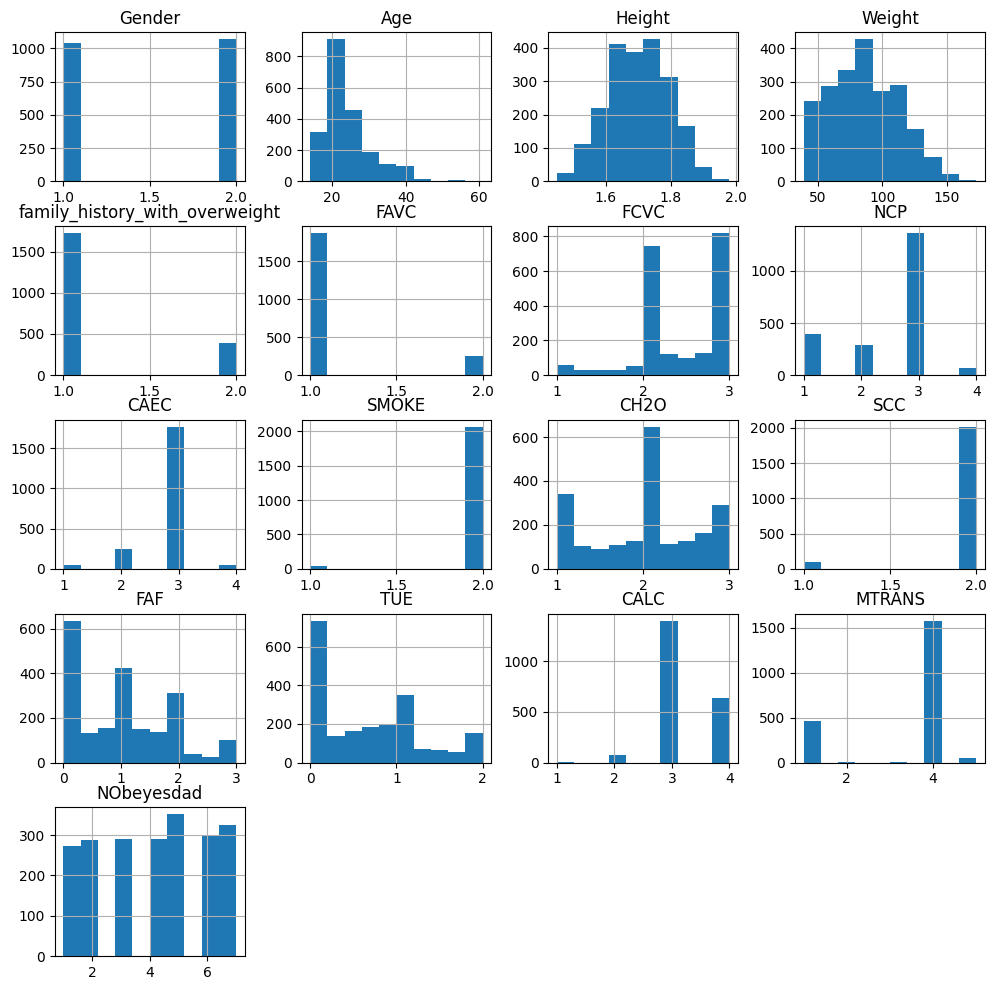

In [246]:
df_obesity.hist(figsize=(12,12))

In [247]:
plt.show()

**Correlación entre características**

<Axes: >

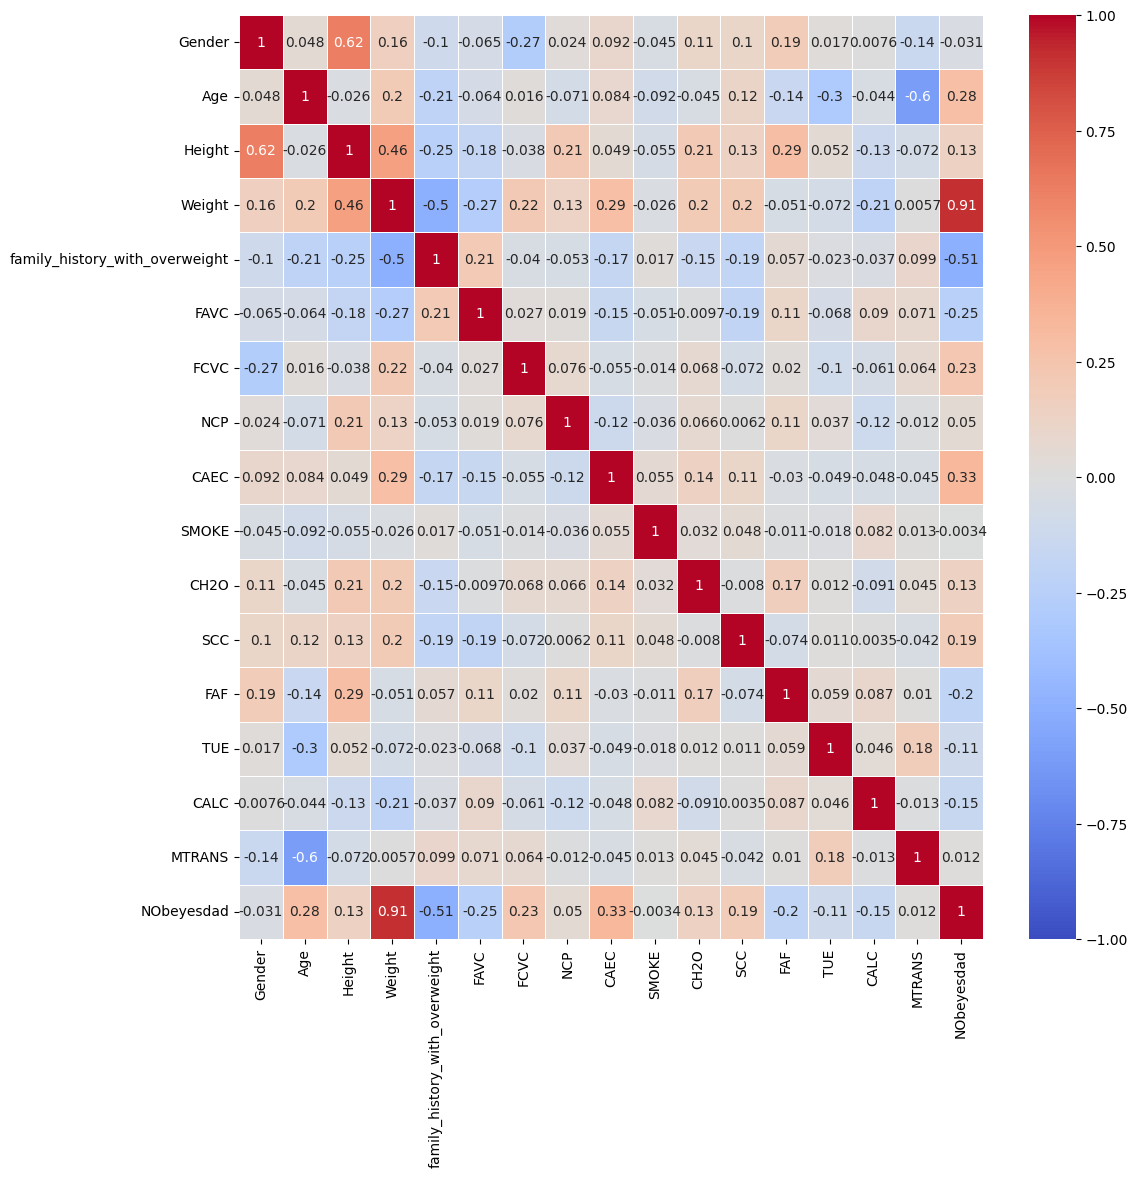

In [248]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_obesity.corr(), cmap = 'coolwarm', annot = True, linewidths=.5, ax=ax, vmin=-1, vmax=+1)

**5. Procesamiento de los datos**

**5.1. Datos vacíos/faltantes**

In [249]:
for col in df_obesity.columns:
    pct_missing = np.mean(df_obesity[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,3)))

Gender - 0.0%
Age - 0.0%
Height - 0.0%
Weight - 0.0%
family_history_with_overweight - 0.0%
FAVC - 0.0%
FCVC - 0.0%
NCP - 0.0%
CAEC - 0.0%
SMOKE - 0.0%
CH2O - 0.0%
SCC - 0.0%
FAF - 0.0%
TUE - 0.0%
CALC - 0.0%
MTRANS - 0.0%
NObeyesdad - 0.0%


**5.2. Información detallada**

In [250]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   int64  
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

*No hay datos vacíos*

**5.2. Diagrama de cajas**

Gender                               Axes(0.125,0.747241;0.133621x0.132759)
Age                               Axes(0.285345,0.747241;0.133621x0.132759)
Height                             Axes(0.44569,0.747241;0.133621x0.132759)
Weight                            Axes(0.606034,0.747241;0.133621x0.132759)
family_history_with_overweight    Axes(0.766379,0.747241;0.133621x0.132759)
FAVC                                 Axes(0.125,0.587931;0.133621x0.132759)
FCVC                              Axes(0.285345,0.587931;0.133621x0.132759)
NCP                                Axes(0.44569,0.587931;0.133621x0.132759)
CAEC                              Axes(0.606034,0.587931;0.133621x0.132759)
SMOKE                             Axes(0.766379,0.587931;0.133621x0.132759)
CH2O                                 Axes(0.125,0.428621;0.133621x0.132759)
SCC                               Axes(0.285345,0.428621;0.133621x0.132759)
FAF                                Axes(0.44569,0.428621;0.133621x0.132759)
TUE         

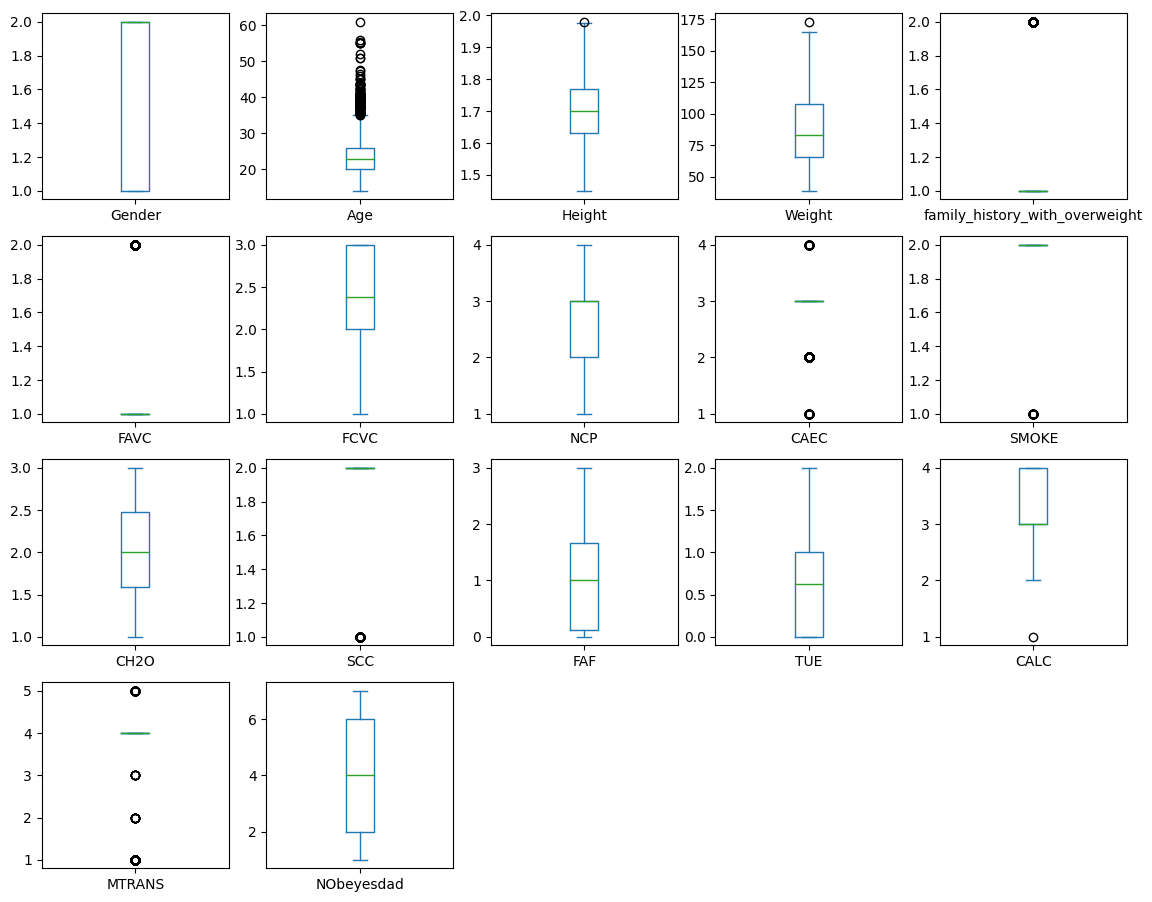

In [251]:
df_obesity.plot(kind='box',subplots=True,layout=(5,5),sharex=False,sharey=False,figsize=(14,14))

In [252]:
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [253]:
def HallaMejorPercentilSup(micol,  maximo, minimo, miCotaSup):
	for x in range(maximo, minimo, -1):
		valor_tope_actual = np.quantile(df_obesity.iloc[:,micol] , x/100)
		print(f"Percentil {x} = {np.round_(valor_tope_actual,micol)},col = {micol}, CotaSup = {miCotaSup}")
		if(valor_tope_actual <= miCotaSup):
			return x , valor_tope_actual

In [254]:
col = 1

In [255]:
q3=np.quantile(df_obesity.iloc[:,col] , 0.75)

In [256]:
q1=np.quantile(df_obesity.iloc[:,col] , 0.25)

In [257]:
IQR=q3-q1

In [258]:
CotaSup=q3+1.5*IQR

In [259]:
PercentilSupSugerido , ValorTecho = HallaMejorPercentilSup(col, 99, 80, CotaSup)

Percentil 99 = 43.6,col = 1, CotaSup = 35.079212
Percentil 98 = 41.0,col = 1, CotaSup = 35.079212
Percentil 97 = 39.9,col = 1, CotaSup = 35.079212
Percentil 96 = 38.9,col = 1, CotaSup = 35.079212
Percentil 95 = 38.1,col = 1, CotaSup = 35.079212
Percentil 94 = 37.6,col = 1, CotaSup = 35.079212
Percentil 93 = 36.8,col = 1, CotaSup = 35.079212
Percentil 92 = 35.0,col = 1, CotaSup = 35.079212


In [260]:
df_obesity.iloc[:,col] = np.where(df_obesity.iloc[:,col] > ValorTecho, ValorTecho, df_obesity.iloc[:,col] )

Gender                               Axes(0.125,0.747241;0.133621x0.132759)
Age                               Axes(0.285345,0.747241;0.133621x0.132759)
Height                             Axes(0.44569,0.747241;0.133621x0.132759)
Weight                            Axes(0.606034,0.747241;0.133621x0.132759)
family_history_with_overweight    Axes(0.766379,0.747241;0.133621x0.132759)
FAVC                                 Axes(0.125,0.587931;0.133621x0.132759)
FCVC                              Axes(0.285345,0.587931;0.133621x0.132759)
NCP                                Axes(0.44569,0.587931;0.133621x0.132759)
CAEC                              Axes(0.606034,0.587931;0.133621x0.132759)
SMOKE                             Axes(0.766379,0.587931;0.133621x0.132759)
CH2O                                 Axes(0.125,0.428621;0.133621x0.132759)
SCC                               Axes(0.285345,0.428621;0.133621x0.132759)
FAF                                Axes(0.44569,0.428621;0.133621x0.132759)
TUE         

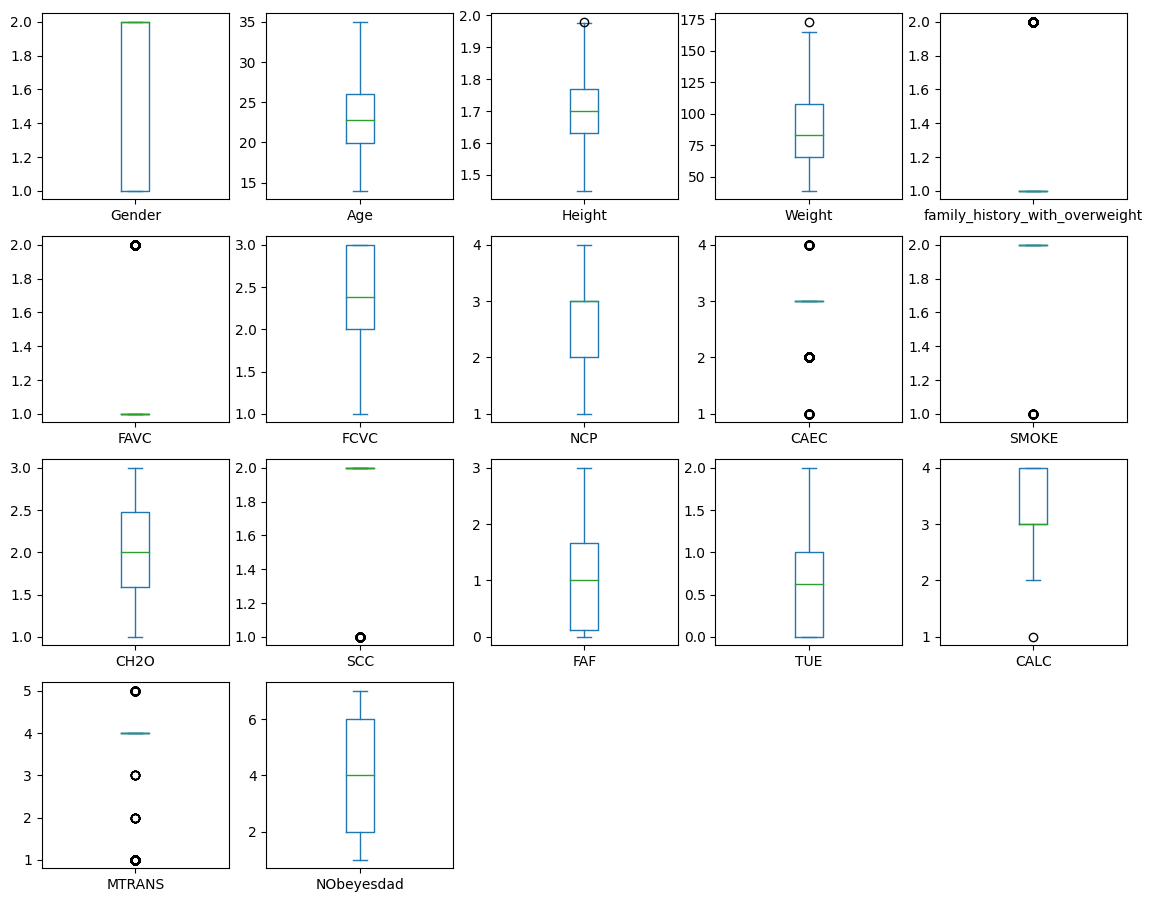

In [261]:
df_obesity.plot(kind='box',subplots=True,layout=(5, 5), sharex=False, sharey=False, figsize=(14, 14))

In [262]:
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

**5.3. Análisis de datos innecesarios**

In [263]:
num_rows = len(df_obesity.index)

In [264]:
low_information_cols = []

In [265]:
for col in df_obesity.columns:
    cnts = df_obesity[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]

    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

SMOKE: 97.91568%
2    2067
1      44
Name: SMOKE, dtype: int64

SCC: 95.45239%
2    2015
1      96
Name: SCC, dtype: int64



In [266]:
df_obesity = df_obesity.copy()

In [267]:
column = 'Age'

In [268]:
df_obesity[column] = MinMaxScaler().fit_transform(np.array(df_obesity[column]).reshape(-1,1))

In [269]:
display(df_obesity)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,0.333333,1.620000,64.000000,1,2,2.0,3,3,2,2.000000,2,0.000000,1.000000,4,4,2
1,1,0.333333,1.520000,56.000000,1,2,3.0,3,3,1,3.000000,1,3.000000,0.000000,3,4,2
2,2,0.428571,1.800000,77.000000,1,2,2.0,3,3,2,2.000000,2,2.000000,1.000000,2,4,2
3,2,0.619048,1.800000,87.000000,2,2,3.0,3,3,2,2.000000,2,2.000000,0.000000,2,5,3
4,2,0.380952,1.780000,89.800000,2,2,2.0,1,3,2,2.000000,2,0.000000,0.000000,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,0.332231,1.710730,131.408528,1,1,3.0,3,3,2,1.728139,2,1.676269,0.906247,3,4,7
2107,1,0.380140,1.748584,133.742943,1,1,3.0,3,3,2,2.005130,2,1.341390,0.599270,3,4,7
2108,1,0.405906,1.752206,133.689352,1,1,3.0,3,3,2,2.054193,2,1.414209,0.646288,3,4,7
2109,1,0.493426,1.739450,133.346641,1,1,3.0,3,3,2,2.852339,2,1.139107,0.586035,3,4,7


**5.4. Estandarización de los datos**

In [270]:
df_obesity = df_obesity.copy()

In [271]:
column = 'Weight'

In [272]:
df_obesity[column] = MinMaxScaler().fit_transform(np.array(df_obesity[column]).reshape(-1,1))

In [273]:
display(df_obesity)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,0.333333,1.620000,0.186567,1,2,2.0,3,3,2,2.000000,2,0.000000,1.000000,4,4,2
1,1,0.333333,1.520000,0.126866,1,2,3.0,3,3,1,3.000000,1,3.000000,0.000000,3,4,2
2,2,0.428571,1.800000,0.283582,1,2,2.0,3,3,2,2.000000,2,2.000000,1.000000,2,4,2
3,2,0.619048,1.800000,0.358209,2,2,3.0,3,3,2,2.000000,2,2.000000,0.000000,2,5,3
4,2,0.380952,1.780000,0.379104,2,2,2.0,1,3,2,2.000000,2,0.000000,0.000000,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,0.332231,1.710730,0.689616,1,1,3.0,3,3,2,1.728139,2,1.676269,0.906247,3,4,7
2107,1,0.380140,1.748584,0.707037,1,1,3.0,3,3,2,2.005130,2,1.341390,0.599270,3,4,7
2108,1,0.405906,1.752206,0.706637,1,1,3.0,3,3,2,2.054193,2,1.414209,0.646288,3,4,7
2109,1,0.493426,1.739450,0.704079,1,1,3.0,3,3,2,2.852339,2,1.139107,0.586035,3,4,7


**5.5. Extraer Datos *(Test y Train)***

Datos de entrada *Var Independientes*

In [274]:
x = df_obesity.iloc[:, :-1].values

In [275]:
print(x)

[[1.    0.333 1.62  ... 1.    4.    4.   ]
 [1.    0.333 1.52  ... 0.    3.    4.   ]
 [2.    0.429 1.8   ... 1.    2.    4.   ]
 ...
 [1.    0.406 1.752 ... 0.646 3.    4.   ]
 [1.    0.493 1.739 ... 0.586 3.    4.   ]
 [1.    0.46  1.739 ... 0.714 3.    4.   ]]


Datos de salida *Var Dependiente*

In [276]:
y = df_obesity.iloc[:, -1].values

In [277]:
print(y)

[2 2 2 ... 7 7 7]


In [278]:
datos_extracion = SelectKBest(score_func=chi2, k=5)

In [279]:
entrenamiento = datos_extracion.fit(x, y)

In [280]:
np.set_printoptions(precision=3)

In [281]:
print(entrenamiento.scores_)

[109.178  61.717   1.066 192.639  78.441  21.449  60.322  65.314  30.428
   0.331  17.404   2.732  71.762  26.126  15.144  72.547]


In [282]:
caracteristicas = entrenamiento.transform(x)

In [283]:
print(caracteristicas[0:10,:])

[[1.    0.187 1.    0.    4.   ]
 [1.    0.127 1.    3.    4.   ]
 [2.    0.284 1.    2.    4.   ]
 [2.    0.358 2.    2.    5.   ]
 [2.    0.379 2.    0.    4.   ]
 [2.    0.104 2.    0.    1.   ]
 [1.    0.119 1.    1.    2.   ]
 [2.    0.104 2.    3.    4.   ]
 [2.    0.187 1.    1.    4.   ]
 [2.    0.216 1.    1.    4.   ]]


In [284]:
x =df_obesity.iloc[:, [0,1,2,3,4,6,7,12,15]].values

In [285]:
print(x)

[[1.    0.333 1.62  ... 3.    0.    4.   ]
 [1.    0.333 1.52  ... 3.    3.    4.   ]
 [2.    0.429 1.8   ... 3.    2.    4.   ]
 ...
 [1.    0.406 1.752 ... 3.    1.414 4.   ]
 [1.    0.493 1.739 ... 3.    1.139 4.   ]
 [1.    0.46  1.739 ... 3.    1.026 4.   ]]


**Datos de entrenamiento**

In [286]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.30,random_state=0)

In [287]:
x_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [288]:
print("Train_x :",x_train.shape)

Train_x : (1181, 9)


In [289]:
print("Test_x :",x_test.shape)

Test_x : (634, 9)


In [290]:
print("Train_y :",y_train.shape)

Train_y : (1181,)


In [291]:
print("Test_y :",y_test.shape)

Test_y : (634,)


In [292]:
df_obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,0.333333,1.62,0.186567,1,2,2.0,3,3,2,2.0,2,0.0,1.0,4,4,2
1,1,0.333333,1.52,0.126866,1,2,3.0,3,3,1,3.0,1,3.0,0.0,3,4,2
2,2,0.428571,1.80,0.283582,1,2,2.0,3,3,2,2.0,2,2.0,1.0,2,4,2
3,2,0.619048,1.80,0.358209,2,2,3.0,3,3,2,2.0,2,2.0,0.0,2,5,3
4,2,0.380952,1.78,0.379104,2,2,2.0,1,3,2,2.0,2,0.0,0.0,3,4,4


In [293]:
conteo_datos = df_obesity.groupby('NObeyesdad').size()

In [294]:
print(conteo_datos)

NObeyesdad
1    272
2    287
3    290
4    290
5    351
6    297
7    324
dtype: int64


In [295]:
data=df_obesity[['Gender','Age','Height','Weight','family_history_with_overweight','FCVC','NCP','FAF','MTRANS','NObeyesdad']]

In [296]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FCVC,NCP,FAF,MTRANS,NObeyesdad
0,1,0.333333,1.62,0.186567,1,2.0,3,0.0,4,2
1,1,0.333333,1.52,0.126866,1,3.0,3,3.0,4,2
2,2,0.428571,1.80,0.283582,1,2.0,3,2.0,4,2
3,2,0.619048,1.80,0.358209,2,3.0,3,2.0,5,3
4,2,0.380952,1.78,0.379104,2,2.0,1,0.0,4,4


In [297]:
dicci = {1:0, 2:1}

In [298]:
data['Gender'] = data['Gender'].map(dicci)

<ipython-input-298-ff723a94d35a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'] = data['Gender'].map(dicci)


In [299]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FCVC,NCP,FAF,MTRANS,NObeyesdad
0,0,0.333333,1.620000,0.186567,1,2.0,3,0.000000,4,2
1,0,0.333333,1.520000,0.126866,1,3.0,3,3.000000,4,2
2,1,0.428571,1.800000,0.283582,1,2.0,3,2.000000,4,2
3,1,0.619048,1.800000,0.358209,2,3.0,3,2.000000,5,3
4,1,0.380952,1.780000,0.379104,2,2.0,1,0.000000,4,4
...,...,...,...,...,...,...,...,...,...,...
2106,0,0.332231,1.710730,0.689616,1,3.0,3,1.676269,4,7
2107,0,0.380140,1.748584,0.707037,1,3.0,3,1.341390,4,7
2108,0,0.405906,1.752206,0.706637,1,3.0,3,1.414209,4,7
2109,0,0.493426,1.739450,0.704079,1,3.0,3,1.139107,4,7


In [300]:
dicci = {1:0, 2:0, 3:1, 4:1,5:1,6:1,7:1}

In [301]:
data['NObeyesdad'] = data['NObeyesdad'].map(dicci)

<ipython-input-301-ac781f160a3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NObeyesdad'] = data['NObeyesdad'].map(dicci)


In [302]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FCVC,NCP,FAF,MTRANS,NObeyesdad
0,0,0.333333,1.620000,0.186567,1,2.0,3,0.000000,4,0
1,0,0.333333,1.520000,0.126866,1,3.0,3,3.000000,4,0
2,1,0.428571,1.800000,0.283582,1,2.0,3,2.000000,4,0
3,1,0.619048,1.800000,0.358209,2,3.0,3,2.000000,5,1
4,1,0.380952,1.780000,0.379104,2,2.0,1,0.000000,4,1
...,...,...,...,...,...,...,...,...,...,...
2106,0,0.332231,1.710730,0.689616,1,3.0,3,1.676269,4,1
2107,0,0.380140,1.748584,0.707037,1,3.0,3,1.341390,4,1
2108,0,0.405906,1.752206,0.706637,1,3.0,3,1.414209,4,1
2109,0,0.493426,1.739450,0.704079,1,3.0,3,1.139107,4,1


In [303]:
conteo_datos = data.groupby('NObeyesdad').size()

In [304]:
print(conteo_datos)

NObeyesdad
0     559
1    1552
dtype: int64


In [305]:
X=data.drop(['NObeyesdad'], axis = 'columns')

In [306]:
y=data['NObeyesdad']

In [307]:
X.shape

(2111, 9)

**5.6. Esquema de escalado**

In [308]:
data = data[['Gender','Age','Height','Weight','family_history_with_overweight','FCVC','NCP','FAF','MTRANS','NObeyesdad']]

In [309]:
scaler = StandardScaler()

In [310]:
scaler.fit(data.drop('NObeyesdad',axis=1))

StandardScaler()

In [311]:
scaled_features = scaler.fit_transform(data.drop('NObeyesdad',axis=1))

In [312]:
X= pd.DataFrame(scaled_features,columns=data.columns[:-1])

In [313]:
y = data['NObeyesdad']

In [314]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FCVC,NCP,FAF,MTRANS
0,-1.011914,-0.551786,-0.875589,-0.862558,-0.472291,-0.785019,0.574095,-1.188039,0.504320
1,-1.011914,-0.551786,-1.947599,-1.168077,-0.472291,1.088342,0.574095,2.339750,0.504320
2,0.988227,-0.171764,1.054029,-0.366090,-0.472291,-0.785019,0.574095,1.163820,0.504320
3,0.988227,0.588278,1.054029,0.015808,2.117337,1.088342,0.574095,1.163820,1.296448
4,0.988227,-0.361775,0.839627,0.122740,2.117337,-0.785019,-1.835277,-1.188039,0.504320


**5.8. Se separa los datos: 70% train y 30% test**

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [316]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [317]:
print("X_train :",X_train.shape)

X_train : (1181, 9)


In [318]:
print("X_test :", X_test.shape)

X_test : (634, 9)


In [319]:
print("y_train :", y_train.shape)

y_train : (1181,)


In [320]:
print("y_test :", y_test.shape)

y_test : (634,)


**5.7. Lista para gráficar los accuracy de todos los modelos**

In [321]:
accL=[]

**6. Redes Neuronales**


**6.1. Construir el modelo de redes neuronales**

Contruida con la biblioteca TensorFlow

In [322]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2), #Regularizar
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2), #Regularizar
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2), #Regularizar
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.2), #Regularizar
    tf.keras.layers.Dense(1, activation='sigmoid')
])

*Se está compilando el modelo de redes neuronales antes de entrenarlo*

In [323]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**Entrenar el modelo**

In [324]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [325]:
entren = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
24/24 [==============================] - 1s 12ms/step - loss: 0.6901 - accuracy: 0.5224 - val_loss: 0.6451 - val_accuracy: 0.7432
Epoch 2/100
24/24 [==============================] - 0s 5ms/step - loss: 0.6104 - accuracy: 0.7384 - val_loss: 0.5304 - val_accuracy: 0.7736
Epoch 3/100
24/24 [==============================] - 0s 5ms/step - loss: 0.4804 - accuracy: 0.8010 - val_loss: 0.3889 - val_accuracy: 0.8311
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 0.3805 - accuracy: 0.8366 - val_loss: 0.3136 - val_accuracy: 0.9020
Epoch 5/100
24/24 [==============================] - 0s 5ms/step - loss: 0.3248 - accuracy: 0.8747 - val_loss: 0.2784 - val_accuracy: 0.8953
Epoch 6/100
24/24 [==============================] - 0s 5ms/step - loss: 0.2802 - accuracy: 0.8891 - val_loss: 0.2499 - val_accuracy: 0.9020
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2444 - accuracy: 0.8950 - val_loss: 0.2264 - val_accuracy: 0.9189
Epoch 8/100


**Evaluación del modelo en el conjunto de prueba**

In [326]:
loss, accuracy = model.evaluate(X_test, y_test)

20/20 [==============================] - 0s 2ms/step - loss: 0.0581 - accuracy: 0.9779


In [327]:
loss = entren.history['loss']

In [328]:
val_loss = entren.history['val_loss']

In [329]:
print("Loss:", loss)

Loss: [0.6900580525398254, 0.6103521585464478, 0.4803737699985504, 0.3804764151573181, 0.3247896432876587, 0.28021275997161865, 0.2443651556968689, 0.21513992547988892, 0.20434994995594025, 0.18336640298366547, 0.17921270430088043, 0.15363936126232147, 0.14468638598918915, 0.14080819487571716, 0.12991811335086823, 0.13654711842536926, 0.12083477526903152, 0.11275903880596161, 0.10280121862888336, 0.1096305325627327, 0.10926656424999237, 0.09283720701932907, 0.0870019793510437, 0.07514172047376633, 0.07974865287542343, 0.1013166680932045, 0.07463917881250381, 0.07994073629379272, 0.07406346499919891, 0.07001006603240967, 0.06096689775586128, 0.05512470752000809, 0.06867075711488724, 0.06025468930602074]


In [330]:
print("Val_Loss:", val_loss)

Val_Loss: [0.6451200246810913, 0.5304466485977173, 0.3889160752296448, 0.3136366903781891, 0.2784114480018616, 0.24985355138778687, 0.22643789649009705, 0.20344585180282593, 0.18301700055599213, 0.16846239566802979, 0.16288058459758759, 0.15166805684566498, 0.1666819006204605, 0.12572504580020905, 0.13847410678863525, 0.12837910652160645, 0.11331166326999664, 0.09880362451076508, 0.10423028469085693, 0.08759968727827072, 0.08051782846450806, 0.07884742319583893, 0.08264043927192688, 0.08356644958257675, 0.08854292333126068, 0.07084189355373383, 0.06890876591205597, 0.08180536329746246, 0.06647396832704544, 0.07322440296411514, 0.0692707970738411, 0.06817536801099777, 0.06826549023389816, 0.07481081783771515]


In [331]:
accuracy = entren.history['accuracy']

In [332]:
val_accuracy = entren.history['val_accuracy']

In [333]:
print("Accuracy:", accuracy)

Accuracy: [0.5224385857582092, 0.7383573055267334, 0.801016092300415, 0.8365791440010071, 0.8746824860572815, 0.8890770673751831, 0.8950042128562927, 0.9178662300109863, 0.9280270934104919, 0.9271803498268127, 0.9339542984962463, 0.9475021362304688, 0.9424216747283936, 0.9500423073768616, 0.9508890509605408, 0.9491956233978271, 0.9585097432136536, 0.960203230381012, 0.9593564867973328, 0.9568162560462952, 0.9644368886947632, 0.9703640937805176, 0.9686706066131592, 0.9737510681152344, 0.9737510681152344, 0.9627434611320496, 0.9737510681152344, 0.9661303758621216, 0.9703640937805176, 0.9729043245315552, 0.9805249571800232, 0.9788314700126648, 0.9779847860336304, 0.9788314700126648]


In [334]:
print("Val_Accuracy:", val_accuracy)

Val_Accuracy: [0.7432432174682617, 0.7736486196517944, 0.8310810923576355, 0.9020270109176636, 0.8952702879905701, 0.9020270109176636, 0.9189189076423645, 0.9256756901741028, 0.9290540814399719, 0.9324324131011963, 0.9324324131011963, 0.9391891956329346, 0.9324324131011963, 0.9459459185600281, 0.9459459185600281, 0.9459459185600281, 0.9527027010917664, 0.9527027010917664, 0.9527027010917664, 0.9662162065505981, 0.9729729890823364, 0.9662162065505981, 0.9662162065505981, 0.962837815284729, 0.9662162065505981, 0.9729729890823364, 0.9729729890823364, 0.9763513803482056, 0.9763513803482056, 0.9662162065505981, 0.9695945978164673, 0.9763513803482056, 0.9797297120094299, 0.9763513803482056]


In [335]:
epocas=range(1,len(loss)+1)

**Predecir**

In [336]:
predictions = model.predict(X_test)

20/20 [==============================] - 0s 2ms/step


In [337]:
print(predictions)

[[4.746e-03]
 [9.998e-01]
 [9.988e-01]
 [9.973e-01]
 [2.028e-02]
 [1.000e+00]
 [6.203e-04]
 [1.000e+00]
 [1.000e+00]
 [9.181e-01]
 [9.916e-01]
 [9.708e-01]
 [9.938e-01]
 [1.000e+00]
 [9.990e-01]
 [1.761e-03]
 [1.000e+00]
 [9.759e-01]
 [9.996e-01]
 [1.000e+00]
 [1.000e+00]
 [1.000e+00]
 [9.998e-01]
 [1.000e+00]
 [9.994e-01]
 [1.000e+00]
 [5.293e-04]
 [1.000e+00]
 [9.825e-01]
 [9.501e-03]
 [8.812e-01]
 [1.168e-04]
 [1.927e-01]
 [1.000e+00]
 [1.000e+00]
 [1.000e+00]
 [7.625e-04]
 [9.960e-01]
 [9.964e-01]
 [4.628e-03]
 [9.984e-01]
 [1.357e-04]
 [2.117e-04]
 [9.993e-01]
 [7.816e-05]
 [9.998e-01]
 [1.746e-01]
 [9.994e-01]
 [9.876e-01]
 [1.000e+00]
 [1.000e+00]
 [9.992e-01]
 [1.250e-01]
 [5.524e-04]
 [1.000e+00]
 [3.050e-04]
 [9.995e-01]
 [1.000e+00]
 [9.996e-01]
 [1.000e+00]
 [9.995e-01]
 [1.000e+00]
 [3.205e-05]
 [8.345e-03]
 [9.998e-01]
 [2.875e-01]
 [7.410e-01]
 [1.000e+00]
 [1.287e-04]
 [9.996e-01]
 [9.901e-01]
 [8.527e-01]
 [1.000e+00]
 [1.000e+00]
 [1.016e-01]
 [1.000e+00]
 [9.999e-01]

**Umbral decisión para obtener las prediccciones binarias**

In [338]:
threshold = 0.5

In [339]:
binary_predictions = (predictions > threshold).astype(int)

In [340]:
print("Predicciones binarias del sobrepeso:")

Predicciones binarias del sobrepeso:


In [341]:
binary_predictions =binary_predictions.flatten()

In [342]:
print(binary_predictions)

[0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0
 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1
 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 

**Gráfico de la evolución de la pérdida y la precisión**

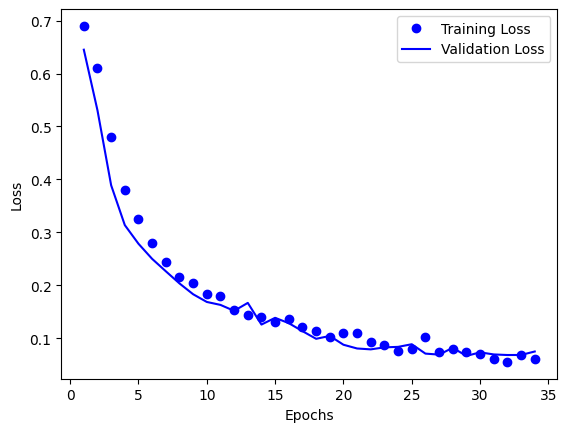

In [343]:
plt.plot(epocas,loss,'bo', label='Training Loss')
plt.plot(epocas,val_loss,'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Gráfico la evolución de la precisión**

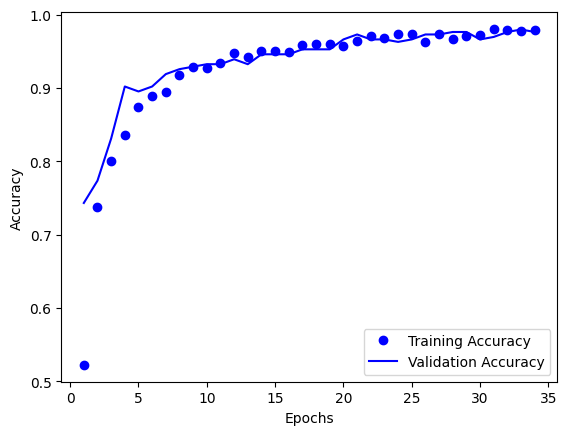

In [344]:
plt.plot(epocas,accuracy,'bo', label='Training Accuracy')
plt.plot(epocas,val_accuracy,'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [345]:
score = accuracy_score(y_test, binary_predictions)

In [346]:
result = model.evaluate(X_test,y_test)

20/20 [==============================] - 0s 2ms/step - loss: 0.0581 - accuracy: 0.9779


In [347]:
matrix = confusion_matrix(y_test, binary_predictions)

In [348]:
print(score)

0.9779179810725552


In [349]:
print(result)

[0.058106593787670135, 0.9779179692268372]


In [350]:
print(matrix)

[[159   9]
 [  5 461]]
